# Creation and indexing of arrays in python

The fundamental data structure in many kinds of data analysis is the *n-dimensional array*. In Matlab, everything is an array; in python, the array is the fundamental data structure in numpy. This notebook will walk you (slowly) through various means to create, manipulate, and index into arrays. 

Eventually, we will load an array of fMRI data, and 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
# Optional line for prettier plots on high-dpi screens (uncomment to try if you have a retina display)
# %config InlineBackend.figure_format = 'retina'

## Creating arrays
There are many ways to create arrays in python. 

The most basic way to create an array in python is from a more basic, general python structure: the list. Lists are created by enclosing numbers, strings, or whatever other objecst you want in brackets, like this: 

In [2]:
list1 = [0, 1, 2, 3, 4]
list2 = ['I', 'am', 'a', 'list']
list3 = ['Lists', 'can', 'have', 'different', 'stuff', 'in', 'them', 0, 1, list2]

Lists are good for agglomerating all manner of stuff, but they aren't much good for math. Technically, arrays can contain things besides numbers, too, but arrays of objects are not as commonly used in data science and will be  beyond our scope here. However, lists provide a good first introduction to *indexing*, or selecting the values you want from a data structure. 

In python, the first element of a list or array has the index value 0. This is different from Matlab, which is often confusing for people who start programming in python after programming in Matlab. There are many blog posts and opinion pieces you can find about the relative merits of indexing from zero, but most of the pro reasons come down to elegant indexing - or more specifically, elegant slicing of arrays. It's a bit confusing to remember that the first element of an array is 0, or that the third is 2, but when you want to extract ranges of values from an array (which is actually far more common than pulling individual values), things get nicer. 

### Aside on zero-based indexing

In [3]:
# To index a list, you can select one or more items with numbers or numbers and colons
print(list1[0]) # first item in list 1
print(list2[1]) # the second item in list 2
print(list3[:3]) # the first 3 items in list 3. 

0
am
['Lists', 'can', 'have']


To select all values from the beginning or to the end of an array, you do not have to specify `(1:...)` or `(...:end)`, as you do in Matlab; the colon suffices to indicate all values from the beginning or end (see third line of code above).

Note that, to get the first three elements of an array in Matlab would require the syntax `list3(1:3+1)`. People who like zero-based indexing find +1s like that ugly and cumbersome. And if you program in python for a while, you will find that you end up writing fewer `+1`s or `-1`s when indexing arrays. Here's another benefit of the way python indexes:

In [4]:
# To split an array at a particular index value, you can write: 
idx = 2
part_a = list2[:idx]
part_b = list2[idx:]
print(part_a, part_b)

['I', 'am'] ['a', 'list']


I hope you can see that this convention allows for clean syntax for many purposes. This is pretty. This is the reason you will be confused until you learn to love it.

## Indexing lists or 1D arrays
Colon syntax allows you to slice arrays in many ways. The general form is `some_list[start:stop:step]`. Not all of these values have to be provided. If you provide only `some_list[start:stop]`, the `step` is assumed to be 1 (and all values between `start` and `stop` are returned). If you don't provide `start` or `stop` (as in the above examples), then all values from the beginining are taken (for missing `start`) and/or all values to the end are returned (for missing `stop`). So, you can also call `some_list[start::step]` to take every (`step`) value from `start` until the end of the array. Note that start, stop, and step must be integers - but they can be negative. Negative indicates values from the end, or backwards steps. Thus:

In [5]:
print(list1)
# (for each of the values below, we specify a STEP only; the start and end are assumed to be the beginning of the 
# array and the end, since no values are given before the first and second colons)
# Every other value
print(list1[::2])
# Reverse the list (this is common syntax!)
print(list1[::-1])
# Every other value from the end of the array backwards:
print(list1[-1::-2])

[0, 1, 2, 3, 4]
[0, 2, 4]
[4, 3, 2, 1, 0]
[4, 2, 0]


## Useful functions to create arrays
Back to arrays. Arrays can be created from lists using np.array():

In [6]:
# This creates a 1-dimensional array:
list_1d = [5, 2, 3, 1]
array_1d = np.array(list_1d)
# Note that this could be compressed to one line:
# array_1d = np.array([5, 2, 3, 1])
# But we don't want to do too much too fast.
print('1D array:')
print(array_1d)

# Two-dimensional arrays can be created from multiple lists:
row1 = [1, 2, 3, 4]
row2 = [5, 6 ,7, 8]
row3 = [9, 10, 11, 12]
# Note that here, np.array() still takes a list as an argument, it's just a list of lists
array_2d = np.array([row1, row2, row3])
print('\n2D array:')
print(array_2d)

1D array:
[5 2 3 1]

2D array:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [7]:
# You can always get the shape of an array by calling the shape method of the array:
print(array_2d.shape)

(3, 4)


That is: this array is 3 elements tall and 4 elements wide. 

Manually creating arrays from lists can be tedious. And sometimes we will want to create particular types of arrays (for example, sequential numbers or random numbers). The following functions are generally useful for creating arrays with particular properties:

```python
np.ones() # Generates an array of ones in some particular shape
np.zeros() # Generates an array of zeros in some particular shape
np.random.rand() # generates random uniformly distributed numbers between 0 and 1 in some shape
np.random.randn() # random normally distributed numbers with mean 0 and standard deviation 1 with 
                  # some shape specified
np.linspace() # generates n equally spaced numbers between some minimum and some maximum. 
              # Always returns a vector (a 1D array)
np.arange() # generates sequential values from some minimum to some maximum (or potentially maximum 
            # to minimum) with the STEP SIZE specified rather than the number of values. Always 
            # returns a vectior (a 1D array)
```

Note that that last is not "arrange" - it's meant to be an abbreviation of "ARRAY-range", since `range()` is a function that generates an iterator in python (outside of numpy). If you are just starting out in python, you can think of an iterator as something like a list, though that's not precisely correct. Anyway: A-range (np.arange()) behaves much like `range()` but generates arrays.



In [8]:
# Some examples
print(np.linspace(0, 1, 5))
print(np.arange(4, 10, 2))
print(np.random.rand(2, 3))
print(np.random.randn(5, 2))

[0.   0.25 0.5  0.75 1.  ]
[4 6 8]
[[0.19643115 0.63389969 0.94021686]
 [0.70365876 0.24157075 0.87979079]]
[[-0.35114457  1.0829223 ]
 [ 0.50103893 -0.256207  ]
 [-0.78978904  0.74534698]
 [-0.0574914   0.04891419]
 [ 0.25492182  1.11426382]]


For these and all other functions, you can always get help to learn or refresh your memory about the requisite syntax by calling the function plus a question mark, thus:

In [20]:
np.linspace?

Note that the help often contains example calls to the function. 

# Exercises: Array generation

## A
Make an array of 400 evenly spaced values between -10 and 10

## B 
Make an array of random values between 0 and 1 that is (500 x 128)

## C
Make an array of random values between 0 and 5 that is (20 x 20)

## D
Make an array of random values between -1 and 1 that is (15 x 4)

In [ ]:
# A
A = ...
# B
B = ...
# C
C = ...
# D
D = ...

# Indexing multi-dimensional arrays
We've already seen how to index lists; 1D arrays work just the same. When arrays are 2D, more indices must be specified. 

In [9]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
# Use integer indices for each dimension to specify individual values
print(a[0, 1])
print(a[1, 3])

2
8


In [10]:
# Use slice notation (:) to select ranges of values
print(a[:, 1:])
print(a[:, 2:3])

[[2 3 4]
 [6 7 8]]
[[3]
 [7]]


Note that all of the above return 2D arrays (just like the original array). If you use integer indices, you will reduce the dimensionality of the array into which you are indexing. For example, if you want to select only the 3rd column of `a` above (and return a 2-long 1D array), you would call the following:

In [11]:
# Slice indexing (with start:end) keeps 2D array 
print('Slicing:')
print(a[:, 2:3])
print(a[:, 2:3].shape)
# Integer indexing removes one dimension
print('Integer indexing:')
print(a[:, 2])
print(a[:, 2].shape)

Slicing:
[[3]
 [7]]
(2, 1)
Integer indexing:
[3 7]
(2,)


# Exercises: Array indexing
## A 
Select the last half of the values in the array `A` that you created above. (call it A_pt2)
## B
Select the 3rd row of the array  `B` that you created above (call it B3)
## C
Select every other row from the 10th row from the end of the array to the last row of the array in `C` from above.
## D
Select every other row and column in `D` above.

In [12]:
# Answers

# A

# B

# C

# D


Another really useful function (which we have made / will make much use of in class) is `np.meshgrid()`. This function is a little more confusing than the simple generation functions above, so I will introduce it with some motivation. Let's say you want to evaluate a 2D Gaussian function at a series of values. The equation for a 2D circular Gaussian is:

$g = e^{-\frac{(x-\mu_x)^2 + (y-\mu_y)^2}{2\sigma^2}}$

Here is a function to evaluate the value in a Gaussian for a given $x_0$, $y_0$, and $\sigma$ (X center, Y center, and width): 

In [13]:
def gauss(x, y, x0=3, y0=2, sigma=1.5):
    g = np.e**(-((x - x0)**2 + (y-y0)**2)/(2*sigma**2))
    return g

In [14]:
#You could use this function to evalutate the value for the Gaussian function at particular coordinates:
# Here, we evaluate for (2, 0)
print(gauss(2, 0))
# Here, for (2, 2)
print(gauss(2, 2))

0.32919298780790557
0.8007374029168081


The value is larger the nearer the x and y values are to x0 and y0. Now let's say we want to evaluate a whole mess of values of X and Y. You might consider doing that in a loop, like this:

In [15]:
# Define some xs and ys at which you want to evaluate the Gaussian function
xs = np.arange(10)
ys = np.arange(10)
# Store the output in some sensible format (a 2D array)
g = np.zeros((10, 10))
for x in xs:
    for y in ys:
        g[y, x] = gauss(x, y)
print(g)

[[5.56379983e-02 1.69013315e-01 3.29192988e-01 4.11112291e-01
  3.29192988e-01 1.69013315e-01 5.56379983e-02 1.17436285e-02
  1.58932728e-03 1.37912809e-04]
 [1.08368023e-01 3.29192988e-01 6.41180388e-01 8.00737403e-01
  6.41180388e-01 3.29192988e-01 1.08368023e-01 2.28734649e-02
  3.09558685e-03 2.68617473e-04]
 [1.35335283e-01 4.11112291e-01 8.00737403e-01 1.00000000e+00
  8.00737403e-01 4.11112291e-01 1.35335283e-01 2.85655008e-02
  3.86592014e-03 3.35462628e-04]
 [1.08368023e-01 3.29192988e-01 6.41180388e-01 8.00737403e-01
  6.41180388e-01 3.29192988e-01 1.08368023e-01 2.28734649e-02
  3.09558685e-03 2.68617473e-04]
 [5.56379983e-02 1.69013315e-01 3.29192988e-01 4.11112291e-01
  3.29192988e-01 1.69013315e-01 5.56379983e-02 1.17436285e-02
  1.58932728e-03 1.37912809e-04]
 [1.83156389e-02 5.56379983e-02 1.08368023e-01 1.35335283e-01
  1.08368023e-01 5.56379983e-02 1.83156389e-02 3.86592014e-03
  5.23195397e-04 4.53999298e-05]
 [3.86592014e-03 1.17436285e-02 2.28734649e-02 2.85655008e

OK, that's too big to look at, so let's show it as an image. For this, we will use `plt.imshow()`, which displays a 2D array as an image; the color of the image reflects the values in the array (the mapping between values and colors can be changed by specifying a `cmap='some_colormap'` keyword argument to `plt.imshow()`). We will talk more about this function and other plotting functions in a different notebook.

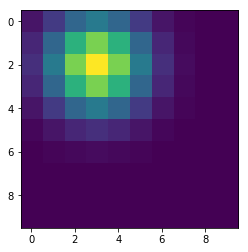

In [16]:
# Neat: the values of the Gaussian smoothly fall off away from (2, 3)
plt.imshow(g)

... But, we don't have to do this in a loop. It would be better to evaluate a whole bunch of X and Y values all at once, and the way the function is written will support this (the math will work just the same on arrays as it works on individual [scalar] values of X and Y). So we need a way to create a bunch of ordered X and Y values all at once. Enter `np.meshgrid()`. This function creates 2D arrays that vary in each of two separate dimensions (technically, it's good for N dimensional arrays varying in each of N different dimensions). 

In [17]:
# Define the range of values you want for X and Y:
xs = np.arange(10)
ys = np.arange(10)
# Create xg and yg (x grid and y grid)
xg, yg = np.meshgrid(xs, ys)
print(xg)
print(yg)

[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]
[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9 9 9 9]]


Now, we can pass these to the `gauss` function and get the same result:

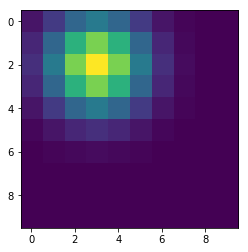

In [18]:
# Neat - same result, much less code!
gg = gauss(xg, yg)
plt.imshow(gg)

Note that this also gives you lots of flexibility. Let's say you wanted to define a finer-grained grid over which to evaluate the Gaussian. You can do that with meshgrid:

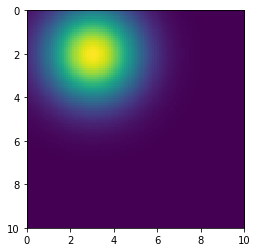

In [19]:
# Let's evaluate our Gaussian over a range of 101 different values from -10 to 10 in X and Y
xs = np.linspace(0, 10, 101)
ys = np.linspace(0, 10, 101)
# Create xg and yg (x grid and y grid)
xg, yg = np.meshgrid(xs, ys)
ggg = gauss(xg, yg)
# (Now we have to specify an extent, because we have lots of values between 0 and 10, not just 10 values)
plt.imshow(ggg, extent=(0, 10, 10, 0))

np.meshgrid() is particularly useful for a few cases (which have / will come up in class a fair bit):

* evaluating a function (such as a Gaussian, a Gabor function, or a motion energy function) over many (x,y) locations in the visual field. 
* Selecting ranges of values in different parameters to test 

# Further exercises
Select the first row of the array `g` created above, and plot it using plt.plot(). Select the second row, and do the same thing. Do you understand what you see?

In [25]:
# Answer
